In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dev/Study_DataSet/cluster_example_data.csv")
X = data.values

In [ ]:
X

array([[34,  5,  0],
       [25,  5,  1],
       [30,  2,  2],
       [38, 20,  3],
       [44, 12,  4],
       [48, 18,  5],
       [52, 22,  6],
       [60, 19,  7],
       [34, 18,  8],
       [34, 22,  9],
       [25, 18, 10],
       [25, 15, 11],
       [24, 10, 12],
       [30,  3, 13],
       [40,  3, 14],
       [44,  2, 15],
       [48,  4, 16],
       [52,  4, 17],
       [60,  2, 18],
       [25,  3, 19],
       [52,  4, 20],
       [34, 15, 21],
       [48,  5, 22],
       [44,  8, 23],
       [52,  2, 24],
       [52, 10, 25]])

In [ ]:
data.head()

,size,age,id
0,34,5,0
1,25,5,1
2,30,2,2
3,38,20,3
4,44,12,4


In [ ]:
# 독립변수 지정
X = X[:, :-1]

In [ ]:
import matplotlib.pyplot as plt

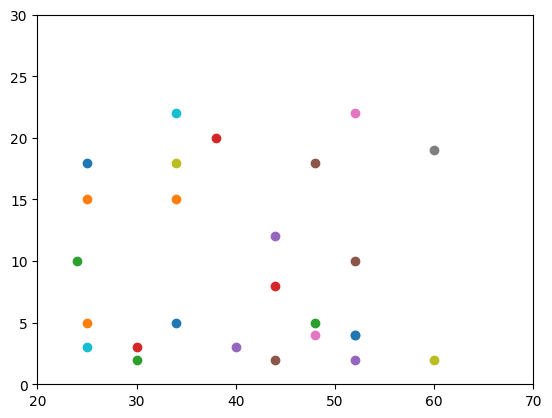

In [ ]:
# plt.figure(figsize=(20, 10))

for v in X:
    plt.scatter(v[0], v[1])

plt.ylim(0, 30) # 그래프의 경계 지정
plt.xlim(20, 70)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
###### K값 지정
NUM_CLUSTERS = 2

In [ ]:
model = KMeans(n_clusters=NUM_CLUSTERS)
clusters = model.fit_predict(X)

In [ ]:
clusters

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1], dtype=int32)

In [ ]:
cluster_nums = []

for doc_num, cluster_num in enumerate(clusters):
    cluster_nums.append(cluster_num)

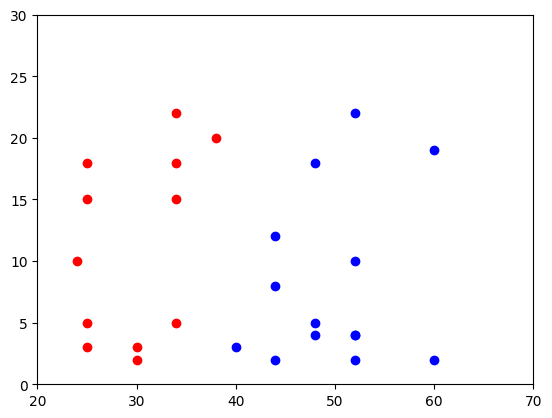

In [ ]:
for k in range(len(X)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0], X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0], X[k][1], c='blue')
    # elif cluster_nums[k] == 2:
    #     plt.scatter(X[k][0], X[k][1], c='yellow')
    # elif cluster_nums[k] == 3:
    #     plt.scatter(X[k][0], X[k][1], c='orange')
    # elif cluster_nums[k] == 4:
    #     plt.scatter(X[k][0], X[k][1], c='green')
    # elif cluster_nums[k] == 5:
    #     plt.scatter(X[k][0], X[k][1], c='purple')
    # elif cluster_nums[k] == 6:
    #     plt.scatter(X[k][0], X[k][1], c='pink')
plt.ylim(0,30)   # 그래프의 경계 지정
plt.xlim(20, 70)
plt.show()

In [ ]:
# 실루엣 스코어 - 최적의 K값을 컴퓨터가 찾아주는 것!
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, max_iter=10) # max_iter = 몇번 계산할건지
    cluster = kmeans.fit_predict(X)
    print(k, silhouette_score(X, cluster))

2 0.4767950237806064
3 0.42053641975934697
4 0.29396962175226804
5 0.43005283013724466
6 0.42645286133989563
7 0.4160052327489315


In [ ]:
# 정규화 - Nomalization
from sklearn.preprocessing import normalize

In [ ]:
X_norm = normalize(X)

In [ ]:
X_norm

array([[0.98935914, 0.14549399],
       [0.98058068, 0.19611614],
       [0.99778516, 0.06651901],
       [0.88491822, 0.46574643],
       [0.96476382, 0.26311741],
       [0.93632918, 0.35112344],
       [0.92096725, 0.38963999],
       [0.95334223, 0.3018917 ],
       [0.88378792, 0.46788772],
       [0.83957016, 0.54325128],
       [0.81153434, 0.58430473],
       [0.85749293, 0.51449576],
       [0.92307692, 0.38461538],
       [0.99503719, 0.09950372],
       [0.99719931, 0.07478995],
       [0.99896854, 0.04540766],
       [0.99654576, 0.08304548],
       [0.99705449, 0.0766965 ],
       [0.99944491, 0.03331483],
       [0.99287684, 0.11914522],
       [0.99705449, 0.0766965 ],
       [0.9149178 , 0.40364021],
       [0.99461841, 0.10360608],
       [0.98386991, 0.17888544],
       [0.99926117, 0.03843312],
       [0.98200645, 0.18884739]])

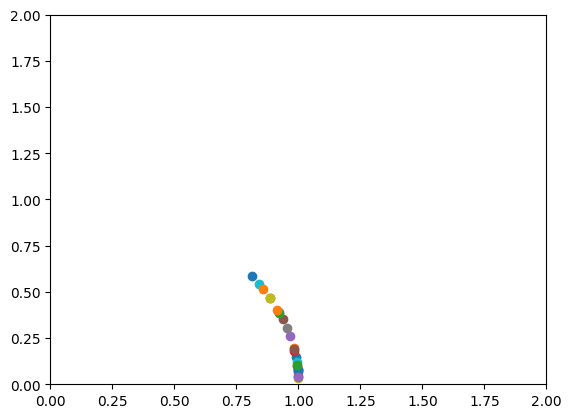

In [ ]:
for v in X_norm:
    plt.scatter(v[0], v[1])

plt.ylim(0,2)   # 그래프의 경계 지정
plt.xlim(0,2)
plt.show()

In [ ]:
clusters_norm = kmeans.fit_predict(X_norm)

In [ ]:
cluster_nums=[]
for doc_num, cluster_num in enumerate(clusters):
    cluster_nums.append(clusters_norm)

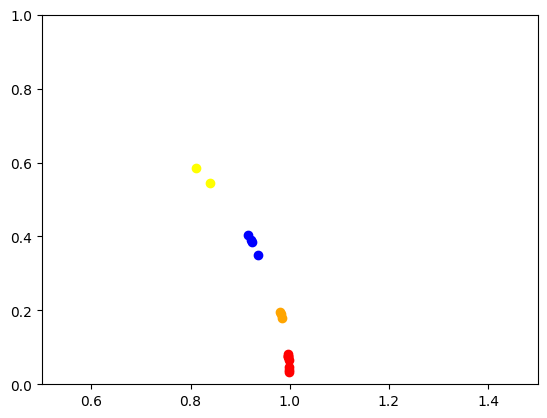

In [ ]:
for k in range(len(X_norm)):
    if clusters_norm[k] == 0:
        plt.scatter(X_norm[k][0], X_norm[k][1], c='red')
    elif clusters_norm[k] == 1:
        plt.scatter(X_norm[k][0], X_norm[k][1], c='blue')
    elif clusters_norm[k] == 2:
        plt.scatter(X_norm[k][0], X_norm[k][1], c='yellow')
    elif clusters_norm[k] == 3:
        plt.scatter(X_norm[k][0], X_norm[k][1], c='orange')
plt.ylim(0,1)   # 그래프의 경계 지정
plt.xlim(0.5,1.5)
plt.show()